<a href="https://colab.research.google.com/github/lwa01/229352-StatisticalLearning/blob/main/229351-LAB01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 1 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ **เมื่อเสร็จแล้วให้ทำการ share** จากนั้นส่ง link มาใน mango canvas

ในขั้นตอนแรก ขอให้ download ไฟล์ที่

http://donlapark.pages.dev/229351/data/housing.csv

In [28]:
import pandas as pd #dataframes
import numpy as np #matrices
import matplotlib.pyplot as plt #for plotting

%matplotlib inline

!wget http://donlapark.pages.dev/229351/data/housing.csv

housing = pd.read_csv("housing.csv")

housing.head(10)

--2025-07-02 14:37:07--  http://donlapark.pages.dev/229351/data/housing.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://donlapark.pages.dev/229351/data/housing.csv [following]
--2025-07-02 14:37:07--  https://donlapark.pages.dev/229351/data/housing.csv
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/csv]
Saving to: ‘housing.csv.2’

housing.csv.2       100%[===================>]   1.36M  --.-KB/s    in 0.04s   

2025-07-02 14:37:07 (36.1 MB/s) - ‘housing.csv.2’ saved [1423529/1423529]



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


## Basic data exploration

In [29]:
housing.shape

(20640, 10)

In [30]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Which variable has missing data?

In [31]:
housing = housing.dropna()

In [32]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [18]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Exercise 1

1. Download ไฟล์ข้อมูลที่
  http://donlapark.pages.dev/229351/data/Advertising.csv
  ซึ่งเป็นข้อมูลของผลการขายสินค้าอย่างหนึ่ง (Sales) กับการโฆษณาผ่านทาง TV, Radio, Newspaper
2. สร้าง dataframe ชื่อว่า **Ads** โดยใช้ข้อมูลชุดนี้
3. ดูข้อมูล 5 แถวแรกของ `Ads`
4. ตรวจสอบว่ามีข้อมูลที่หายไปหรือไม่
5. แสดงค่าสถิติพรรณนา (Descriptive statistics) ของตัวแปรต่างๆ

In [23]:
# code here
# ข้อ 1, 2 ,3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Ads = pd.read_csv("Advertising.csv")
Ads.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [37]:
# ข้อ 4 ตรวจสอบว่ามีข้อมูลที่หายไปหรือไม่
Ads = Ads.dropna()
Ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [38]:
# ข้อ 5 แสดงค่าสถิติพรรณนา (Descriptive statistics) ของตัวแปรต่างๆ
Ads.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Your answers here:

## Calling, indexing & modifying dataframes

In [41]:
# calling a column

housing['ocean_proximity']

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


`ocean_proximity` is categorical. Let's count its values.

In [43]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


## Basic statistics of a variable

In [44]:
print("Mean: ",housing["total_rooms"].mean())
print("Standard deviation: ",housing["total_rooms"].std())
print("Maximum: ",housing["total_rooms"].max())
print("Minimum: ",housing["total_rooms"].min())

Mean:  2636.5042333480155
Standard deviation:  2185.269566977597
Maximum:  39320.0
Minimum:  2.0


In [45]:
housing[["longitude", "latitude", "housing_median_age"]]

,longitude,latitude,housing_median_age
0,-122.23,37.88,41.0
1,-122.22,37.86,21.0
2,-122.24,37.85,52.0
3,-122.25,37.85,52.0
4,-122.25,37.85,52.0
...,...,...,...
20635,-121.09,39.48,25.0
20636,-121.21,39.49,18.0
20637,-121.22,39.43,17.0
20638,-121.32,39.43,18.0


In [46]:
housing.loc[0]

,0
longitude,-122.23
latitude,37.88
housing_median_age,41.0
total_rooms,880.0
total_bedrooms,129.0
population,322.0
households,126.0
median_income,8.3252
median_house_value,452600.0
ocean_proximity,NEAR BAY


## Extracting a subset of dataframe

In [47]:
housing.loc[1:3, ["longitude","latitude"]]

,longitude,latitude
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85


In [48]:
housing.iloc[2:5,:]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Selecting rows based on conditions

In [49]:
housing[housing['latitude']>=40]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1102,-121.54,40.06,17.0,858.0,262.0,47.0,27.0,2.4028,67500.0,INLAND
1850,-124.17,41.80,16.0,2739.0,480.0,1259.0,436.0,3.7557,109400.0,NEAR OCEAN
1851,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,NEAR OCEAN
1852,-124.23,41.75,11.0,3159.0,616.0,1343.0,479.0,2.4805,73200.0,NEAR OCEAN
1853,-124.21,41.77,17.0,3461.0,722.0,1947.0,647.0,2.5795,68400.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
19802,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND
19803,-123.22,40.16,27.0,1848.0,449.0,396.0,150.0,2.8472,41300.0,INLAND
19804,-123.48,40.34,19.0,518.0,108.0,216.0,80.0,2.7083,64500.0,INLAND
19805,-123.43,40.22,20.0,133.0,35.0,87.0,37.0,3.6250,67500.0,INLAND


In [51]:
housing[(housing['longitude']>-122) & (housing['latitude']>=40)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1102,-121.54,40.06,17.0,858.0,262.0,47.0,27.0,2.4028,67500.0,INLAND
3345,-121.11,41.07,26.0,1707.0,308.0,761.0,250.0,2.7188,48100.0,INLAND
3346,-120.96,41.12,29.0,779.0,136.0,364.0,123.0,2.5000,59200.0,INLAND
3347,-121.07,40.85,17.0,976.0,202.0,511.0,175.0,3.6641,80800.0,INLAND
3348,-120.38,40.98,27.0,777.0,185.0,318.0,115.0,1.6833,40000.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
18823,-121.62,41.78,40.0,3272.0,663.0,1467.0,553.0,1.7885,43500.0,INLAND
18824,-121.93,41.86,28.0,4225.0,835.0,1908.0,686.0,1.7400,44000.0,INLAND
18858,-121.76,41.50,31.0,602.0,153.0,112.0,47.0,1.0667,34200.0,INLAND
19735,-121.80,40.34,26.0,4815.0,910.0,1341.0,539.0,2.8810,79800.0,INLAND


## Exercise 2

ในข้อต่อไปนี้ ให้นับแถวและคอลัมน์เริ่มจาก 0
1. แสดงค่าสูงสุดของข้อมูลที่อยู่ในแถวที่ 200-400 ของตัวแปร `total_bedrooms`
2. แสดง 3 คอลัมน์สุดท้ายของพื้นที่ที่มีจำนวนห้องนอน (`total_bedrooms`) มากกว่า 900 ห้อง

In [53]:
# code here
# ข้อ 1 แสดงค่าสูงสุดของข้อมูลที่อยู่ในแถวที่ 200-400 ของตัวแปร total_bedrooms
housing['total_bedrooms'].iloc[200:401].max()

2048.0

In [85]:
# ข้อ 2 แสดง 3 คอลัมน์สุดท้ายของพื้นที่ที่มีจำนวนห้องนอน (total_bedrooms) มากกว่า 900 ห้อง
housing_ = housing[housing['total_bedrooms']>900]
housing_answers = housing_.iloc[ :, -3: ]
print(housing_answers)

       median_income  median_house_value ocean_proximity
1             8.3014            358500.0        NEAR BAY
95            2.0096            130000.0        NEAR BAY
96            2.8345            183800.0        NEAR BAY
98            1.2185            170000.0        NEAR BAY
99            2.6104            193100.0        NEAR BAY
...              ...                 ...             ...
20563         3.1250            132500.0          INLAND
20567         5.3064            165000.0          INLAND
20569         4.1997            133400.0          INLAND
20603         1.3375             59600.0          INLAND
20629         2.0943            108300.0          INLAND

[2382 rows x 3 columns]


In [86]:
housing.columns[-3:]

Index(['median_income', 'median_house_value', 'ocean_proximity'], dtype='object')

## Plotting

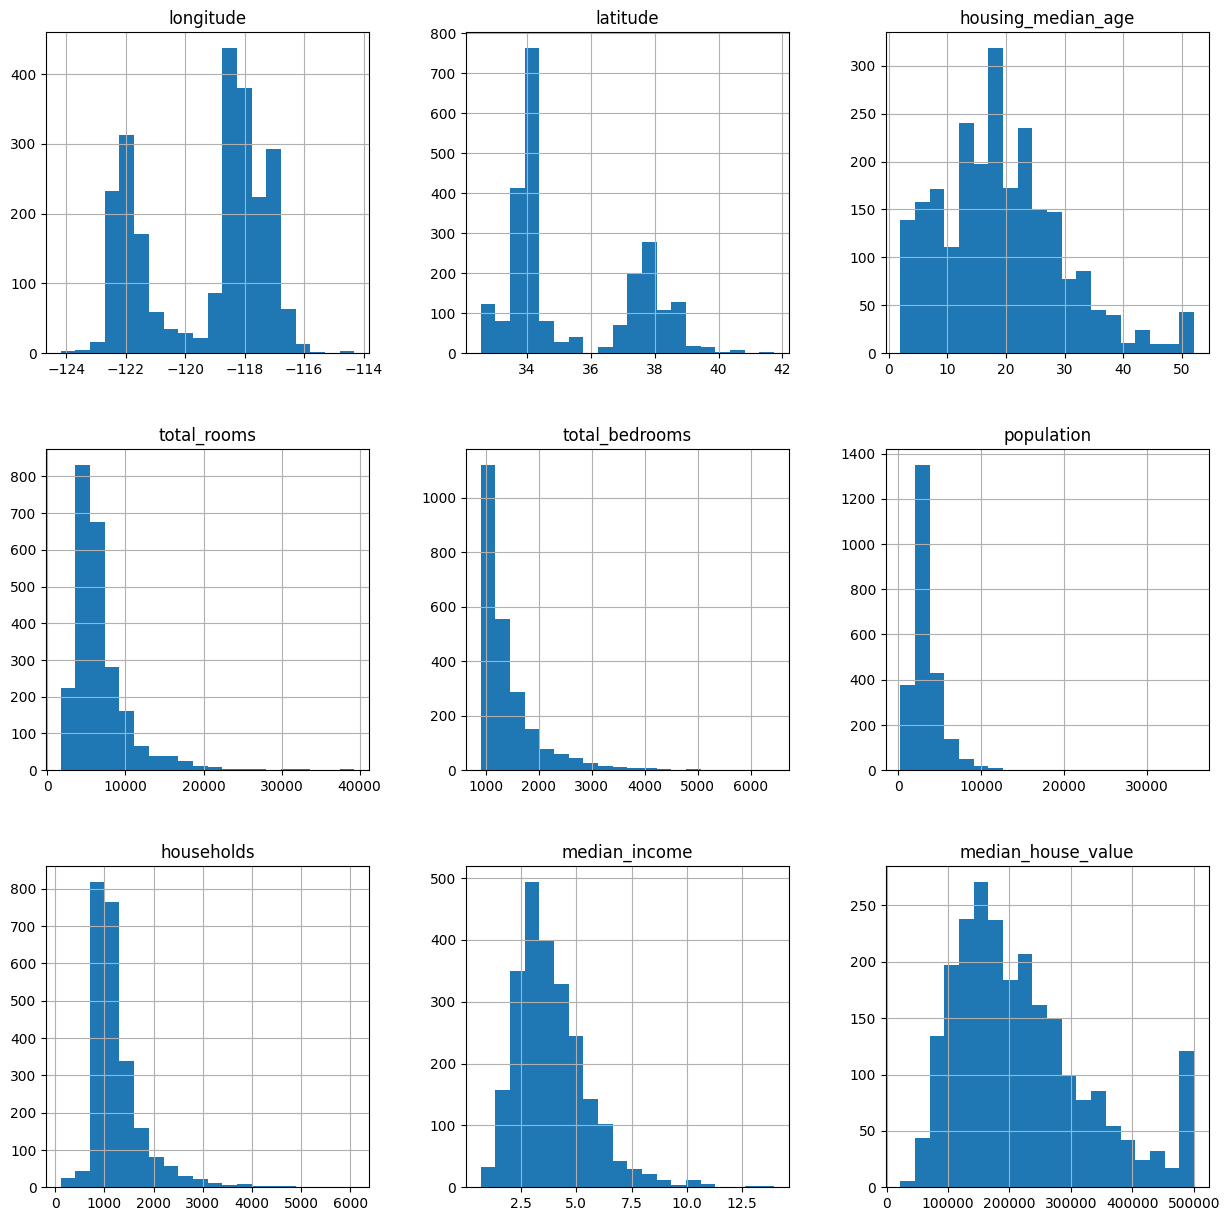

In [87]:
housing.hist(bins=20, figsize=(15,15))
plt.show()

In [88]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,NEAR BAY
96,-122.26,37.82,31.0,4596.0,1331.0,2048.0,1180.0,2.8345,183800.0,NEAR BAY


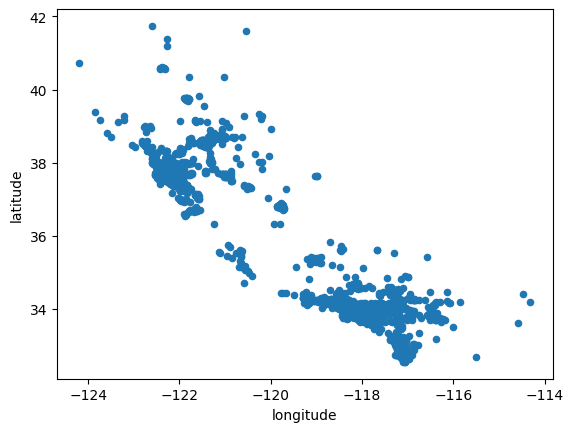

In [119]:
housing.plot.scatter(x="longitude", y="latitude");

<Axes: xlabel='longitude', ylabel='latitude'>

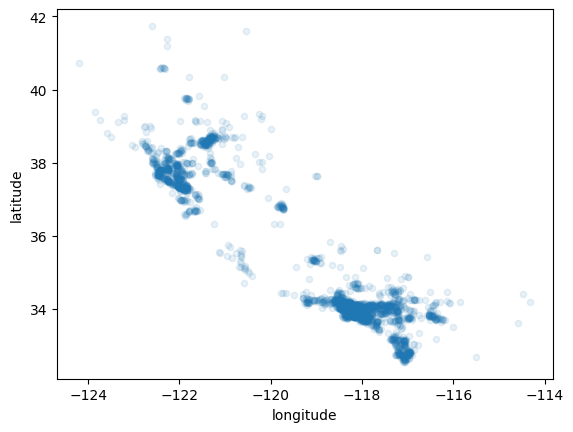

In [90]:
housing.plot.scatter(x="longitude", y="latitude", alpha=0.1)

In [98]:
corr_matrix = housing.iloc[: , :-1].corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.929388,-0.163644,0.067894,0.100457,0.069392,0.026729,-0.062804,-0.127656
latitude,-0.929388,1.000000,0.067864,-0.019917,-0.074153,-0.068517,-0.042645,-0.012767,-0.068817
housing_median_age,-0.163644,0.067864,1.000000,-0.392397,-0.257158,-0.252903,-0.222240,-0.236128,0.233885
total_rooms,0.067894,-0.019917,-0.392397,1.000000,0.871992,0.782154,0.835294,0.404451,0.067405
total_bedrooms,0.100457,-0.074153,-0.257158,0.871992,1.000000,0.780443,0.944215,0.076429,-0.012273
population,0.069392,-0.068517,-0.252903,0.782154,0.780443,1.000000,0.849267,0.129236,-0.098640
households,0.026729,-0.042645,-0.222240,0.835294,0.944215,0.849267,1.000000,0.111299,0.024877
median_income,-0.062804,-0.012767,-0.236128,0.404451,0.076429,0.129236,0.111299,1.000000,0.583850
median_house_value,-0.127656,-0.068817,0.233885,0.067405,-0.012273,-0.098640,0.024877,0.583850,1.000000


### Grouping

พิจารณา Anscombe dataset ข้างล่างนี้

In [99]:
import seaborn as sns

df = sns.load_dataset('anscombe')

In [100]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [107]:
groups = df.groupby('dataset')

In [102]:
groups.get_group('I')

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [103]:
groups.max()

,x,y
dataset,,
I,14.0,10.84
II,14.0,9.26
III,14.0,12.74
IV,19.0,12.50


## Exercise 3

1. คำนวณค่า mean, standard deviation และ correlation matrix ของแต่ละกลุ่ม
2. สร้าง scatter plot ของแต่ละกลุ่มด้วย `groups.plot.scatter(...)`
3. จากข้อ 1 และข้อ 2 จงบอกว่าการศึกษาค่า summary statistics (mean, s.d., correlation) อย่างเดียวเพียงพอกับการศึกษาข้อมูลชุดหนึ่งหรือไม่ เพราะเหตุใด

In [113]:
# ข้อ 1 คำนวณค่า mean, standard deviation และ correlation matrix ของแต่ละกลุ่ม
# คำนวณค่า mean ของแต่ละกลุ่ม
groups.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


In [112]:
# คำนวณค่า  standard deviation ของแต่ละกลุ่ม
groups.std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


In [118]:
#คำนวณค่า correlation matrix ของแต่ละกลุ่ม
corr_matrix = groups[['x', 'y']].corr()
corr_matrix

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

<Axes: title={'center': 'Group I'}, xlabel='x', ylabel='y'>

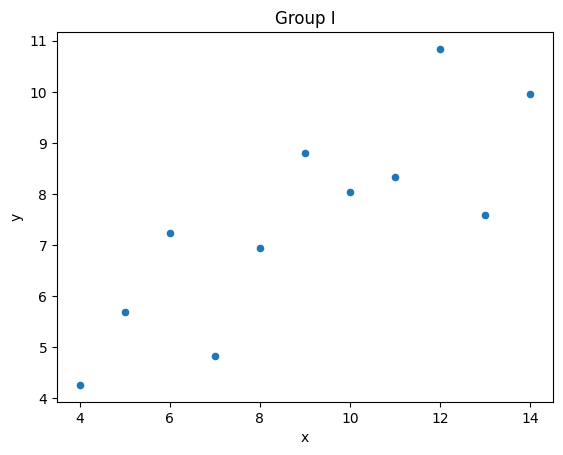

In [125]:
#ข้อ 2 สร้าง scatter plot ของแต่ละกลุ่มด้วย groups.plot.scatter(...)
group_I = groups.get_group('I')
group_I.plot.scatter(x='x', y='y', title='Group I')

<Axes: title={'center': 'Group II'}, xlabel='x', ylabel='y'>

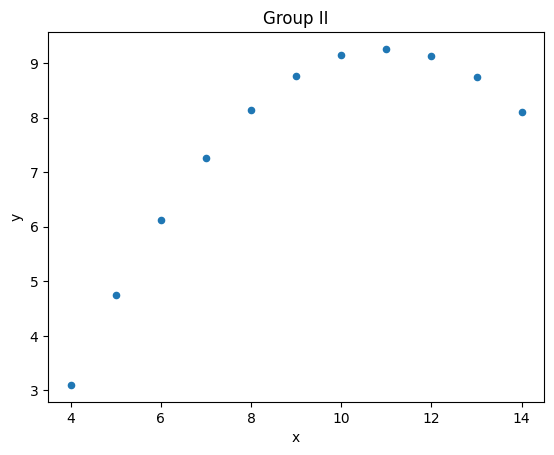

In [126]:
group_II = groups.get_group('II')
group_II.plot.scatter(x='x', y='y', title='Group II')

<Axes: title={'center': 'Group III'}, xlabel='x', ylabel='y'>

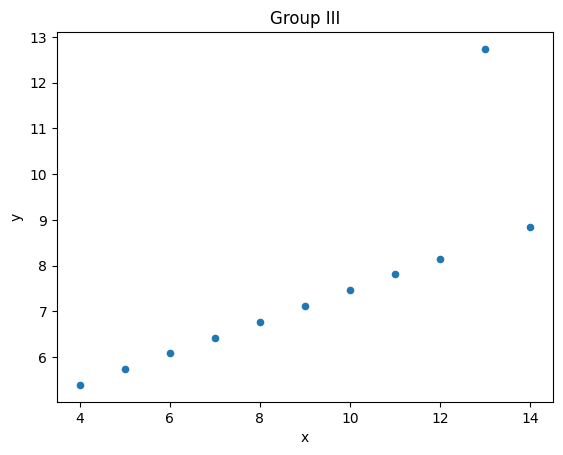

In [127]:
group_III = groups.get_group('III')
group_III.plot.scatter(x='x', y='y', title='Group III')

<Axes: title={'center': 'Group IV'}, xlabel='x', ylabel='y'>

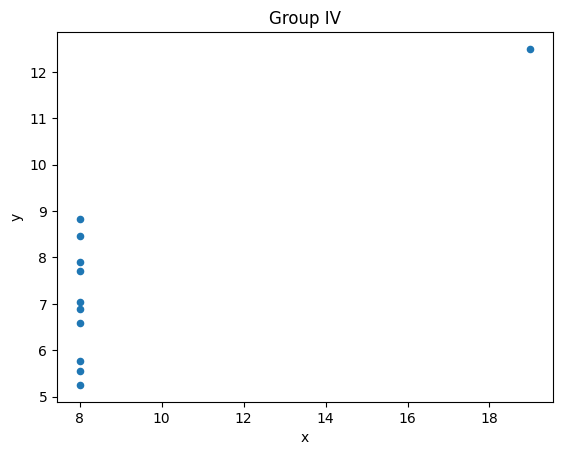

In [128]:
group_IV = groups.get_group('IV')
group_IV.plot.scatter(x='x', y='y', title='Group IV')

#ข้อ 3 จากข้อ 1 และข้อ 2 จงบอกว่าการศึกษาค่า summary statistics (mean, s.d., correlation) อย่างเดียวเพียงพอกับการศึกษาข้อมูลชุดหนึ่งหรือไม่ เพราะเหตุใด
ตอบ  ไม่เพียงพอ เพราะ ค่า summary statistics แสดงเพียงภาพรวม อาจมีข้อมูลตกหล่นได้และค่าCorrelation แสดงเพียงความสัมพันธ์เชิงเส้นเท่านั้นไม่สามารถอธิบายความสัมพันธ์ที่ไม่เป็นเชิงเส้นหรือความสัมพันธ์ที่ซับซ้อนได้
